In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('./train.csv', index_col=0)
test_df = pd.read_csv('./test.csv', index_col=0)
train_df.head(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,CCI,y
date,,,,,,,,,,,,,,,,
2016-01-29,7.24,7.96,7.96,7.24,937736.12,0.72,9.95,7.994,8.436,8.847,672537.57,870945.30,731362.36,0.55,-108.703711,7.66
2016-02-01,8.00,8.05,7.66,7.45,871020.56,-0.30,-3.77,7.762,8.355,8.735,752962.71,909202.37,753408.79,0.51,-101.250160,7.82
2016-02-02,7.65,7.99,7.82,7.60,715115.69,0.16,2.09,7.716,8.205,8.639,749087.34,822574.51,751281.57,0.42,-84.743854,7.75
2016-02-03,7.72,7.82,7.75,7.52,532645.88,-0.06,-0.77,7.688,8.067,8.528,716127.00,708793.18,752322.29,0.31,-88.856109,7.82
2016-02-04,7.79,7.92,7.82,7.71,542949.38,0.08,1.03,7.802,7.990,8.465,719893.53,677847.20,771751.57,0.32,-69.477388,7.72
2016-02-05,7.83,7.88,7.72,7.69,458097.97,-0.10,-1.28,7.754,7.874,8.386,623965.90,648251.73,758085.27,0.27,-68.178096,7.59
2016-02-15,7.47,7.65,7.59,7.33,338035.16,-0.14,-1.81,7.740,7.751,8.305,517368.82,635165.76,727449.63,0.20,-85.890781,7.90
2016-02-16,7.60,8.01,7.90,7.60,715816.81,0.31,4.08,7.756,7.736,8.239,517509.04,633298.19,732189.60,0.42,-46.483755,8.07
2016-02-17,8.00,8.15,8.07,7.88,1093842.12,0.17,2.15,7.820,7.754,8.202,629748.29,672937.64,758252.35,0.64,-19.278062,7.98


,log(y + 1),y
date,,
2016-01-29,2.158715,7.66
2016-02-01,2.177022,7.82
2016-02-02,2.169054,7.75
2016-02-03,2.177022,7.82
2016-02-04,2.165619,7.72


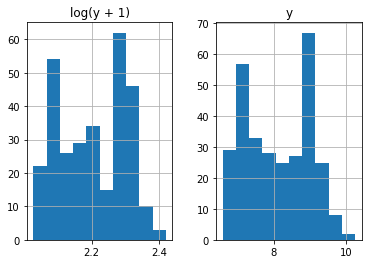

In [3]:
#如果标签值过大，可用LOG方法处理，本次没有对特征值进行标准化处理
prices = pd.DataFrame({"y":train_df["y"], "log(y + 1)":np.log1p(train_df["y"])})
prices.hist()
prices.head()

In [4]:
y_train = np.log1p(train_df.pop('y'))
print(y_train.head())      
y_test = np.log1p(test_df.pop('y'))
print(y_test.head())      

date
2016-01-29    2.158715
2016-02-01    2.177022
2016-02-02    2.169054
2016-02-03    2.177022
2016-02-04    2.165619
Name: y, dtype: float64
date
2017-05-31    2.304583
2017-06-01    2.298577
2017-06-02    2.291524
2017-06-05    2.293544
2017-06-06    2.297573
Name: y, dtype: float64


In [5]:
train_df.shape, test_df.shape

((301, 15), (44, 15))

In [6]:
#生成训练集和测试集
X_train = train_df.values
X_test = test_df.values
type(X_train)

numpy.ndarray

In [7]:
#超参数选择与评分
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

E:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.0698551758639256e-17 / 1.1102230246251565e-16
  RuntimeWarning)
E:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.296331965541906e-17 / 1.1102230246251565e-16
  RuntimeWarning)
E:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.894824955489804e-17 / 1.1102230246251565e-16
  RuntimeWarning)
E:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not gu

E:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.187629028979365e-17 / 1.1102230246251565e-16
  RuntimeWarning)
E:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.852629772634259e-17 / 1.1102230246251565e-16
  RuntimeWarning)
E:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.840112944518086e-17 / 1.1102230246251565e-16
  RuntimeWarning)
E:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not gua

E:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.82067791899526e-17 / 1.1102230246251565e-16
  RuntimeWarning)
E:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0524701671568074e-16 / 1.1102230246251565e-16
  RuntimeWarning)
E:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.854227859239938e-17 / 1.1102230246251565e-16
  RuntimeWarning)
E:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not gua

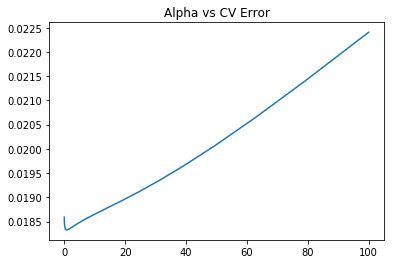

In [8]:
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

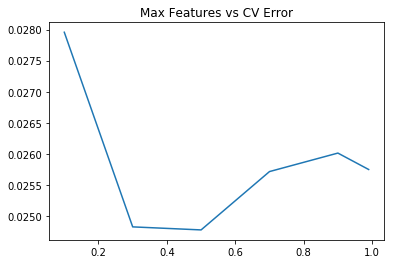

In [11]:
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

In [12]:
#根据以上图示结果选择相应超参数
ridge = Ridge(alpha=.15)
rf = RandomForestRegressor(n_estimators=500, max_features=.5)

In [13]:
#分别用岭回归和随机森林模型进行训练
ridge.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [14]:
y_ridge = np.expm1(ridge.predict(X_test))
y_rf = np.expm1(rf.predict(X_test))

In [15]:
y_final = (y_ridge + y_rf) / 2

In [16]:
#预测结果
submission_df = pd.DataFrame(data= {'date' : test_df.index, 'y_pred': y_final})

In [17]:
submission_df.head(10)

,date,y_pred
0,2017-05-31,8.961868
1,2017-06-01,9.021048
2,2017-06-02,9.016485
3,2017-06-05,8.937358
4,2017-06-06,8.961994
5,2017-06-07,8.992745
6,2017-06-08,8.948045
7,2017-06-09,9.036834
8,2017-06-12,9.012620
9,2017-06-13,8.936173


In [18]:
#把y_test还原
y_test = np.expm1(y_test)
print(y_test.head())

date
2017-05-31    2.304583
2017-06-01    2.298577
2017-06-02    2.291524
2017-06-05    2.293544
2017-06-06    2.297573
Name: y, dtype: float64
date
2017-05-31    9.02
2017-06-01    8.96
2017-06-02    8.89
2017-06-05    8.91
2017-06-06    8.95
Name: y, dtype: float64


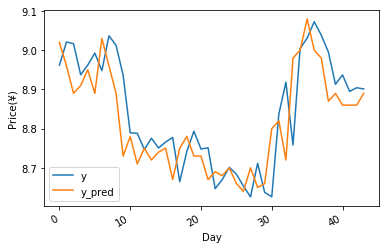

In [19]:
#预测结果与实际做比较
fig, ax = plt.subplots()
ax.plot(list(range(len(submission_df["y_pred"]))),submission_df["y_pred"], label="y")
ax.plot(list(range(len(y_test.index))),y_test.values, label="y_pred")
fig.autofmt_xdate()# 日期的排列根据图像的大小自适应
plt.xlabel('Day')
plt.ylabel('Price(¥)')
plt.legend()
plt.show()